In [608]:
%matplotlib inline
from collections import defaultdict 
from __future__ import print_function
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import copy
import operator

In [609]:
# Actions
LEFT = (0, -1)
RIGHT = (0, 1)
UP = (-1, 0)
DOWN = (1, 0)
ACTIONS = [LEFT, RIGHT, UP, DOWN]
# State Table 
Q = defaultdict(dict)
# Grid Size 
M = 4
N = 3
# Cliff boundaries 
(cliff_start_x, cliff_start_y) = (4, 1)
cliff_x_length, cliff_y_length = (1, 6)
# Epsilon Value for e-greedy policy 
EPSILON = 0.1
ALPHA = 0.7
GAMMA = 0.5
NO_OF_EPISODES = 500

In [610]:
def is_valid_state((i, j)):
    if i > M or j > N or i < 1 or j < 1:
        return False
    return True
def is_terminal_state((i,j)):
    if i == M and j == N:
        return True
    return False
def is_cliff_state((i,j)):
    if i == M and j >= 2 and j < N:
        return True
    return False

In [611]:
def init_Q():
    for i in range(1, M+1):
        for j in range(1, N+1):
            for action in ACTIONS:
                next_state = tuple(map(operator.add, (i,j), action))
                if is_valid_state(next_state):
                    Q[(i,j)][action] = 0 

In [612]:
def get_action_values_from_state(state):
    return Q[state]
    action_values = []
    actions = []
    for action in ACTIONS:
        next_state = tuple(map(operator.add, (i,j), action))
        if is_valid_state(next_state):
            action_values.append(Q[(i,j)][action]) 
            actions.append(action)
    return action_values, actions

In [613]:
def epsilon_greedy((i,j)):
    state = (i,j)
    valid_actions = Q[state].keys()
    max_action = max(Q[state], key=Q[state].get)
#     print('Max action is %s' % (max_action,))
    if random.random() < EPSILON:
        random_action = random.choice(valid_actions)
#         print('Chose %s' % (random_action,))
        return random_action
    max_action = max(Q[state], key=Q[state].get)
#     print('Chose %s' % (max_action,))
    return max_action

In [614]:
def take_action(S, A):
    next_state = tuple(map(operator.add, S, A))
    if is_cliff_state(next_state):
        reward = -100
    else:
        reward = -1
    return next_state, reward

In [615]:
def get_optimal_policy(Q):
    S = (M, 1) # How do u select this ?
    optimal_policy = [S]
    while not is_terminal_state(S):
#         actions = Q[S].keys()
#         max_action = LEFT # Is this okay ?
#         max_action_val = -10000000
#         for action in actions:
#             next_state, _ = take_action(S, action)
#             if not next_state in optimal_policy and Q[S][action] >= max_action_val:
#                 max_action = action
        max_action = max(Q[S], key=Q[S].get)
        next_state, _ = take_action(S, max_action)
        print("Optimal Policy: Next State %s",(next_state,))
        optimal_policy.append(next_state)
        S = next_state
    return optimal_policy

In [616]:
def print_optimal_policy(optimal_policy):
    for i in range(1, M+1):
        for j in range(1, N+1):
            if (i,j) in optimal_policy:
                print('1\t', end="")
            else:
                print('0\t', end="")
        print("")

In [617]:
def sarsa():
    init_Q()
    episode_rewards = []
    for i in range(NO_OF_EPISODES):
#         print('Episode Start %s'%(i))
        S = (M, 1)
        A = epsilon_greedy(S)
        total_episode_reward = 0
        while not is_terminal_state(S):
#             print 'In state %s' % (S,)
            S_next, reward = take_action(S, A)
#             print 'Received Action %s' % (A,)
            total_episode_reward += reward
            A_next = epsilon_greedy(S_next)
            Q[S][A] = Q[S][A] + ALPHA*(reward + GAMMA*Q[S_next][A_next] - Q[S][A])
            S = S_next
            A = A_next    
        episode_rewards.append(total_episode_reward)
#         print('Episode End')
    optimal_policy = get_optimal_policy(Q)
#     for state in Q.keys():
#         print("%s"%(state,))
#         print("%s"%(Q[state],))
    return episode_rewards, optimal_policy

In [618]:
episode_rewards, optimal_policy = sarsa()
print_optimal_policy(optimal_policy)

Optimal Policy: Next State %s ((3, 1),)
Optimal Policy: Next State %s ((2, 1),)
Optimal Policy: Next State %s ((2, 2),)
Optimal Policy: Next State %s ((2, 3),)
Optimal Policy: Next State %s ((3, 3),)
Optimal Policy: Next State %s ((4, 3),)
0	0	0	
1	1	1	
1	0	1	
1	0	1	


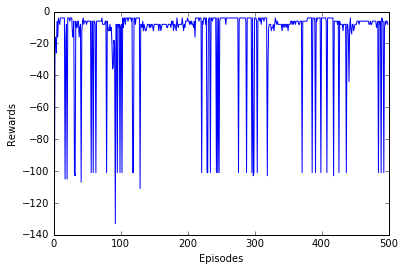

In [619]:
plt.plot(episode_rewards)
plt.ylabel('Rewards')
plt.xlabel('Episodes')